# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {mice}")

Number of mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


# Find the duplicated data 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Displaying duplicate mice records
print(f"Duplicate Mouse IDs are: {duplicate_mouse_ids}")
duplicate_mice

Duplicate Mouse IDs are: ['g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.


In [20]:
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()[0]

cleaned_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]

cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
#Checking the number of mice
number_of_mice = cleaned_data['Mouse ID'].nunique()

print(f'{number_of_mice}')

248


## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)

regimen_stats


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

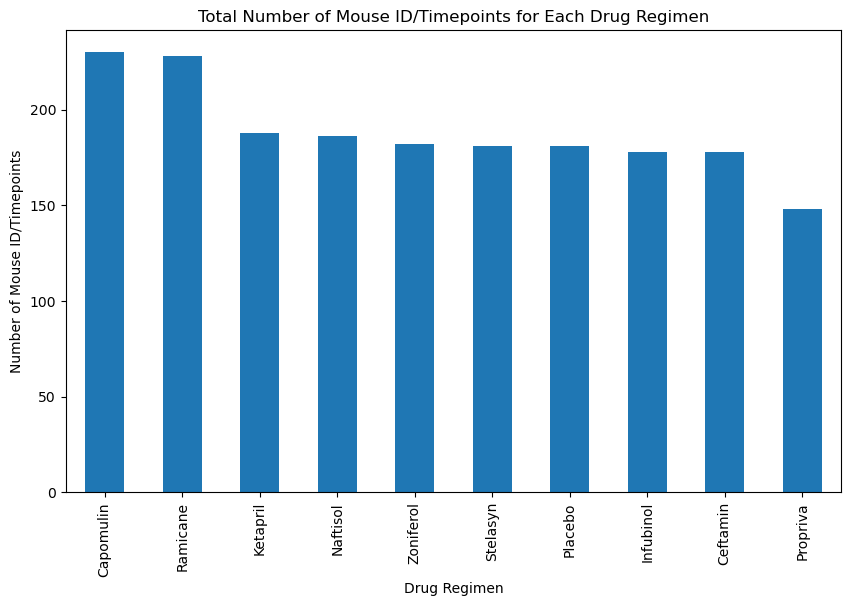

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', figsize=(10,6))

plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

plt.show()

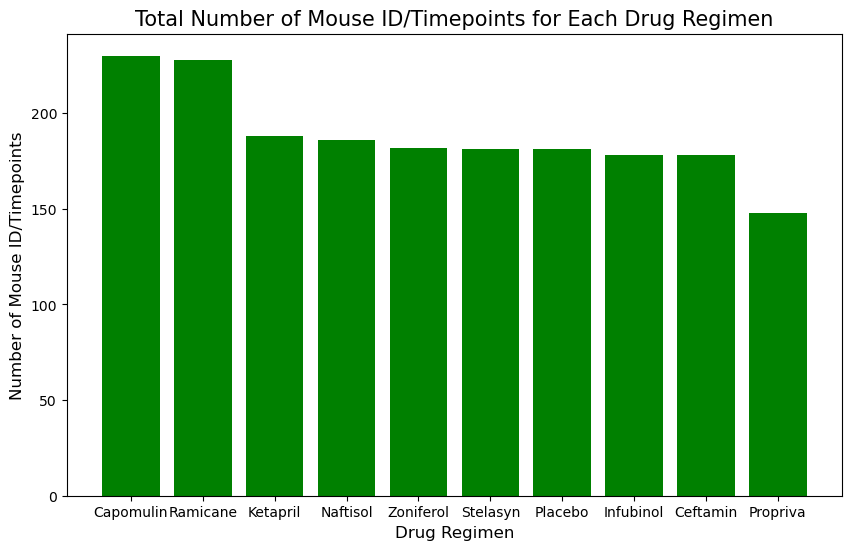

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values, color='green')

# Add labels and title

plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen", fontsize=15)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Mouse ID/Timepoints", fontsize=12)


plt.show()


Text(0.5, 1.0, 'Distribution of Female vs Male Mice Used in the Study')

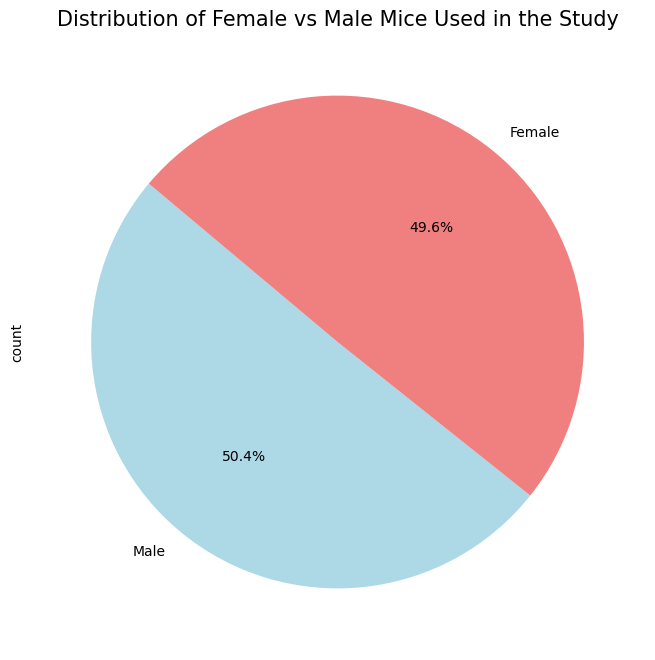

In [125]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

gender_count = unique_mice_gender['Sex'].value_counts()


# Make the pie chart
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8,8), colors=['lightblue', 'lightcoral'])

plt.title("Distribution of Female vs Male Mice Used in the Study", fontsize=15)

In [126]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]

filtered_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [144]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each drug regimen
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = filtered_data[filtered_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list for plotting
    tumor_vol_data.append(drug_data)

    # Calculate the IQR for the drug regimen
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print out the drug regimen and any potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


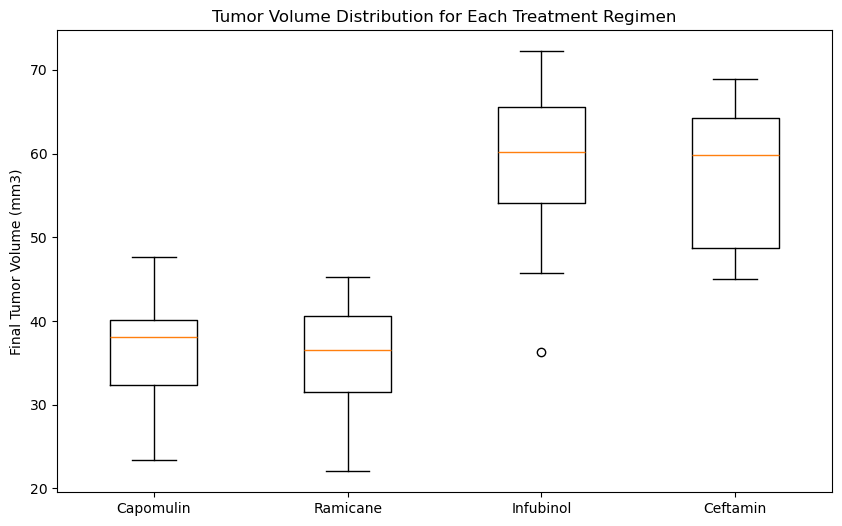

In [149]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(tumor_vol_data, labels=treatment_list)

ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Tumor Volume Distribution for Each Treatment Regimen')

plt.show()

## Line and Scatter Plots

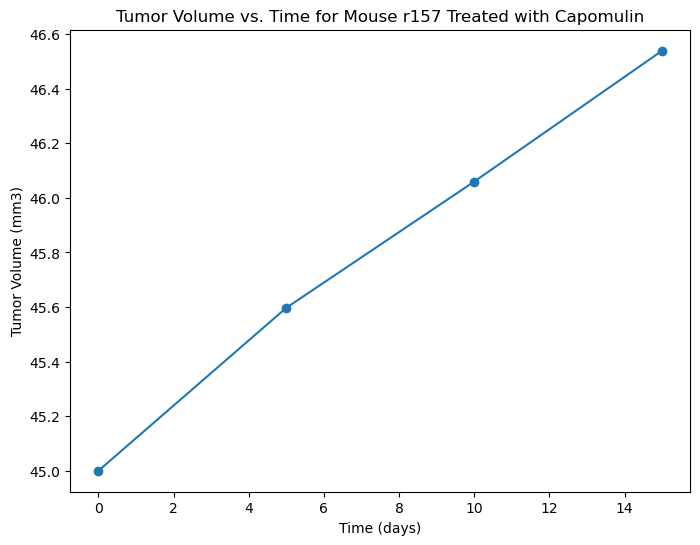

In [153]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = "r157"  

capomulin_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == single_mouse_id) &  (cleaned_data['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time for Mouse {single_mouse_id} Treated with Capomulin')

plt.show()


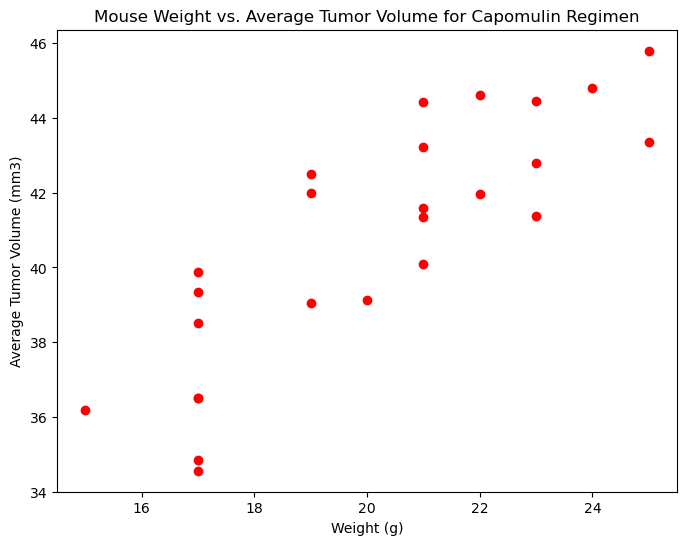

In [158]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694722


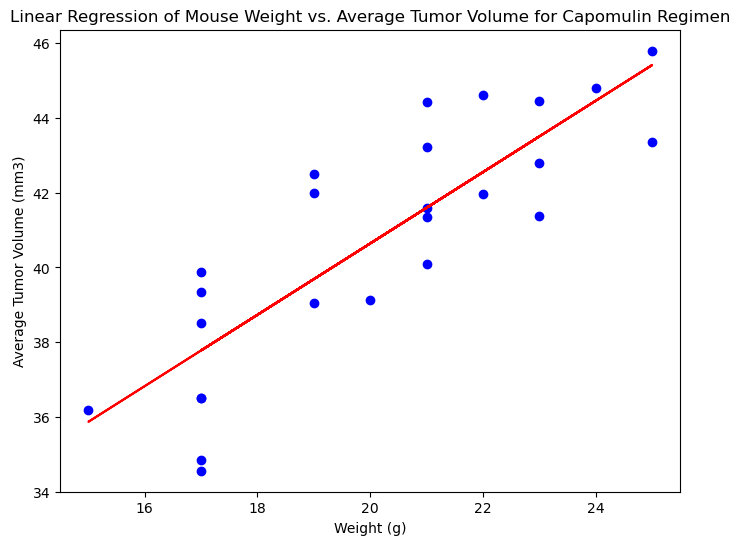

Slope: 0.95
Intercept: 21.55
R-squared value: 0.71
P-value: 1.3225722434712404e-07


In [160]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

weight = capomulin_grouped['Weight (g)']
tumor_volume = capomulin_grouped['Tumor Volume (mm3)']

correlation = weight.corr(tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)

regress_values = weight * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(8, 6))
plt.scatter(weight, tumor_volume, color='blue')
plt.plot(weight, regress_values, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression of Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {rvalue**2:.2f}")
print(f"P-value: {pvalue}")